In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.rcParams['figure.figsize'] = [10, 10]

base_path = '/home/turbotage/Documents/4DRecon/results/'

In [29]:
def method_str(w, l, error_type, start_method, iter=149):
    return error_type + f'w{w:.3e}_l{l:.3e}_i{iter}_{start_method}.npy'

def get_curves(wexponents, lambdas, error_type, start_methods=['mean', 'diff', 'zero'], iter=149, offset=0, stop=None):

    if stop is None:
        stop = iter

    labels = []
    curves = []

    for w in wexponents:
        for l in lambdas:
            
            if 'mean' in start_methods:
                labels.append(f"p={w:.3e}, lambda={l:.3e}, mean")
                curve = np.load(base_path + method_str(w, l, error_type, 'mean', iter))
                curves.append(curve[offset:stop])

            if 'diff' in start_methods:
                labels.append(f'p={w:.3e}, lambda={l:.3e}, diff')
                curve = np.load(base_path + method_str(w, l, error_type, 'diff', iter))
                curves.append(curve[offset:stop])

            if 'zero' in start_methods:
                labels.append(f'p={w:.3e}, lambda={l:.3e}, zero')
                curve = np.load(base_path + method_str(w, l, error_type, 'zero', iter))
                curves.append(curve[offset:stop])

    return curves, labels

def get_curves2(dicts, err_type, iter=149, offset=0, stop=None):
    labels = []
    curves = []

    if stop is None:
        stop = iter

    for key in dicts.keys():
        wexp = dicts[key]['w']
        lambdas = dicts[key]['l']
        for w in wexp:
            for l in lambdas:
                labels.append(f'p={w:.3e}, lambda={l:.3e}, {key}')
                curve = np.load(base_path + method_str(w, l, err_type, key, iter))
                curves.append(curve[offset:stop])

    return curves, labels

def plot_curves(curves, labels, title=''):
    colors = cm.viridis(np.linspace(0, 0.8, len(curves)))
    linestyles=['solid', 'dashed', 'dashdot', 'dotted']
    for i, curve in enumerate(curves):
        plt.plot(curve, color=colors[i], label=labels[i], linestyle=linestyles[i%len(linestyles)])
    plt.legend()
    plt.title(title)
    plt.show()


In [37]:
#curves, labels = get_curves([0.75], [10.0, 1.0, 1e-1, 1e-2, 1e-3], 'err_rel_', ['zero', 'diff'], 200)
#plot_curves(curves, labels, '')

settings = {}
settings['diff'] = {'w': [0.75], 'l': [10.0, 1.0, 1e-1, 1e-2, 1e-3, ]}
#settings['mean'] = {'w': [0.75], 'l': [10.0, 1.0, 1e-1, 1e-2, 1e-3, ]}
#settings['zero'] = {'w': [0.75], 'l': [10.0, 1.0, 1e-1, 1e-2, 1e-3, ]}
#settings['mean'] = {'w': [0.75], 'l': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}

curves, labels = get_curves2(settings, 'err_phase_mean_', 200)
plot_curves(curves, labels, 'Mean Phase Error')


FileNotFoundError: [Errno 2] No such file or directory: '/home/turbotage/Documents/4DRecon/results/err_phase_mean_w7.500e-01_l1.000e-01_i200_zero.npy'

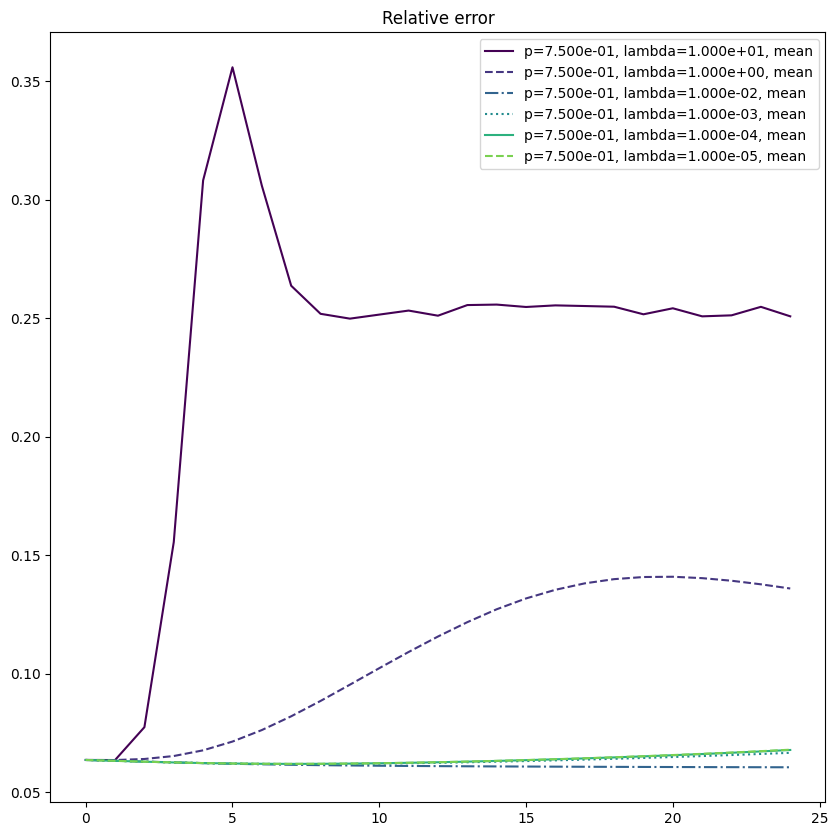

In [35]:
curves, labels = get_curves([0.75], [10.0, 1.0, 1e-2, 1e-3, 1e-4, 1e-5], 'err_phase_mean_', ['mean'], 200, 0, 25)
plot_curves(curves, labels, 'Relative error')

#curves, labels = get_curves([1.0], [10.0, 1.0, 1e-2, 1e-3, 1e-4, 1e-5], 'err_phase_mean_', ['mean'], 200, 0)
#plot_curves(curves, labels, 'Relative error')

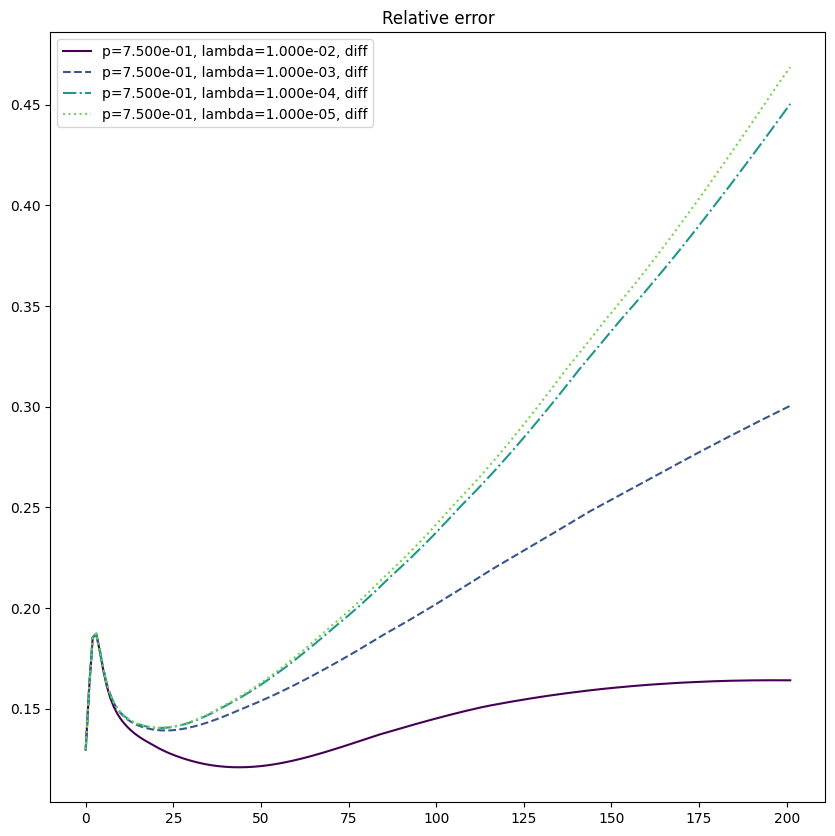

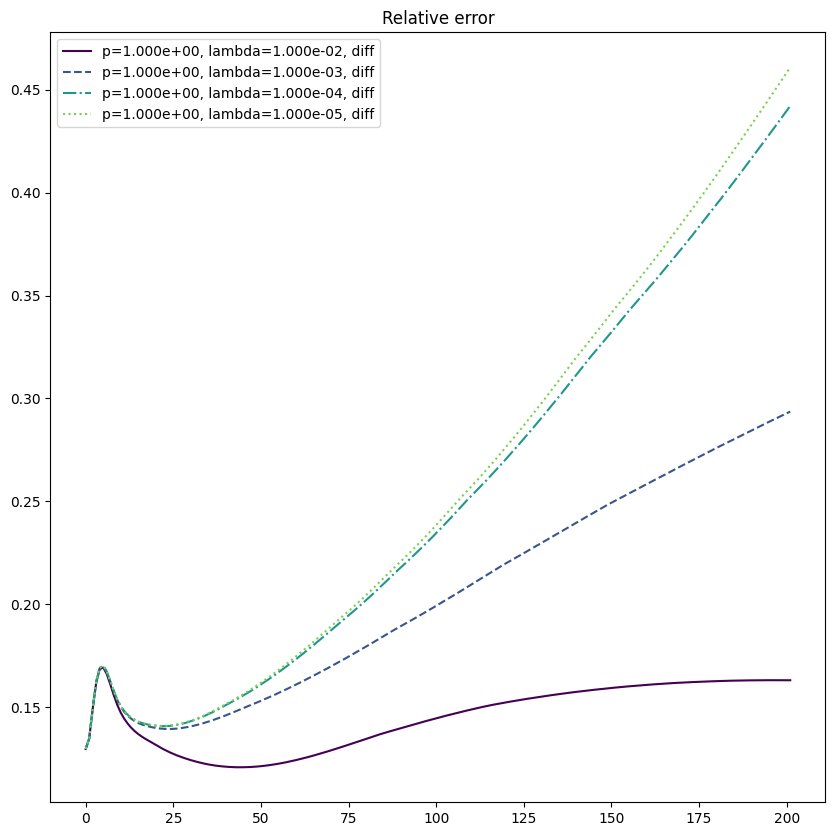

In [5]:
curves, labels = get_curves([0.75], [1e-2, 1e-3, 1e-4, 1e-5], 'err_rel_', ['diff'], 200)
plot_curves(curves, labels, 'Relative error')

curves, labels = get_curves([1.0], [1e-2, 1e-3, 1e-4, 1e-5], 'err_rel_', ['diff'], 200)
plot_curves(curves, labels, 'Relative error')